In [16]:
from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

In [17]:
X, y = load_iris(return_X_y=True)

X = X[:,(2,3)] #2 features
y = (y == 2).astype(np.float64)

In [18]:
lin_SVC = LinearSVC(C = 1, loss = 'hinge')

svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', lin_SVC)
])

In [19]:
svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [20]:
w = lin_SVC.coef_[0]
b = lin_SVC.intercept_[0]

# Na granicy decyzyjnej, w0*x0 + w1*x1 + b = 0
# => x1 = -w0/w1 * x0 - b/w1
x0 = np.linspace(4, 6, 200)
decision_boundary = -w[0]/w[1] * x0 - b/w[1]

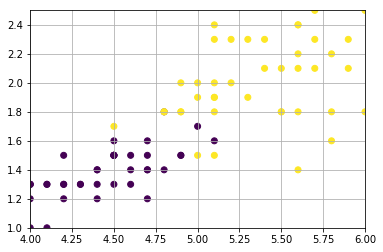

In [21]:
ax = plt.subplot(111)
plt.scatter(X[:,0], X[:,1], c = y.T)
plt.plot(x0, decision_boundary, "r-", linewidth=2)
ax.axis([4,6,1,2.5])
ax.grid(True)